<a href="https://colab.research.google.com/github/bryaanabraham/deep_learning_and_reinforcement_learning/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

####warnings.simplefilter('ignore'):

This line of code is using the simplefilter function from the warnings module to change the behavior of how warnings are handled.
'ignore' is a parameter passed to simplefilter, which means that the code is instructing Python to ignore (or suppress) all warning messages that are issued after this line is executed.
Essentially, it tells Python not to display warning messages to the console or take any default action in response to warnings.

#### MLPClassifier:

MLPClassifier stands for Multi-Layer Perceptron Classifier, which is a type of artificial neural network used for classification tasks.
You can use it to create neural network models with multiple layers (input, hidden, and output) to learn complex patterns in your data.

#### RandomizedSearchCV:

RandomizedSearchCV is a utility for hyperparameter tuning in scikit-learn. It helps you search over a range of hyperparameters in a randomized fashion.
You provide it with a parameter grid or distribution, and it samples hyperparameters to fit and evaluate models for different combinations.
This is useful for finding the best hyperparameters that yield the highest model performance.

#### classification_report:

classification_report is a function that provides a detailed summary of classification metrics.
It includes metrics like precision, recall, F1-score, and support for each class in a multi-class classification problem.
This report is valuable for assessing the performance of a classification model beyond just accuracy.

In [10]:
digits = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv")

labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

#### #**digits = np.array(digits.drop('label', axis=1)).astype('float'):**

This line of code is doing several operations in sequence:<br>
**digits.drop('label', axis=1)**: It removes the 'label' column from the 'digits' DataFrame along the specified axis (axis=1 means columns).<br>
**np.array(...)**: It converts the resulting DataFrame (without the 'label' column) into a NumPy array.<br>
**.astype('float')**: It converts the data type of all elements in the NumPy array to floating-point numbers.<br>
After these operations, 'digits' contains the feature data for the handwritten digits as a NumPy array with floating-point values.

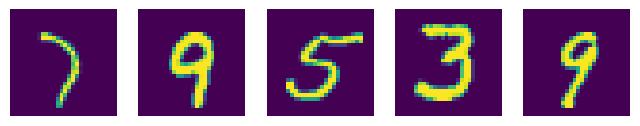

In [20]:
plt.figure(figsize=(8,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

#### plt.figure(figsize=(12,4)):

This line initializes a new figure for plotting with a specified size of 12 inches in width and 4 inches in height.
The figsize parameter controls the dimensions of the figure.

#### for i in range(5):

This is a for loop that iterates 5 times, creating 5 subplots for displaying images.

#### plt.subplot(1, 5, i+1):

Inside the loop, this line sets up a subplot within the figure. It specifies that there is 1 row and 5 columns of subplots (i.e., a row of 5 subplots), and it selects the i+1-th subplot for the current iteration.
The i+1 index is used because subplot indexing starts from 1.

#### plt.imshow(random.choice(digits).reshape(28,28)):

This line displays an image within the current subplot.
random.choice(digits) randomly selects one item (presumably an image) from the 'digits' dataset. This assumes that each item in 'digits' represents an image.
.reshape(28,28) reshapes the selected image to be a 28x28 pixel grid. This is commonly used for displaying images with dimensions like those of handwritten digits.
plt.imshow(...) displays the reshaped image within the current subplot.

####plt.axis("off"):

This line turns off the axis labels and ticks for the current subplot.
It's commonly used for displaying images without the default axis labels, which are not needed when showing images.

In [12]:
split = 0.7, 0.3 # train, test
# normalize data
digits /= 255.0

split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

####digits /= 255.0:
This line normalizes the data in the digits array.
Each element of the digits array is divided by 255.0. This is a common technique for normalizing pixel values in image data. Pixel values in grayscale images typically range from 0 (black) to 255 (white), so dividing by 255 scales them to the range [0, 1]

####split_ind = int(len(digits)*split[0]):
This line calculates the index at which to split the dataset into training and testing sets.
len(digits) returns the total number of samples in the digits array.
split[0] is the first element of the split tuple, which is 0.7 (70% for training).

Using MLPClassifier with the default parameter values gives an accuracy of 0.9726212205380526


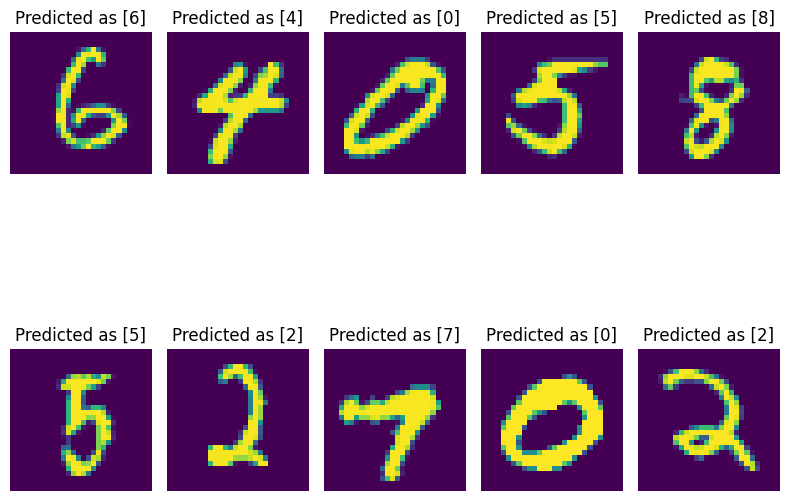

In [25]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = model.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()

**Precision**: Precision is the ratio of true positives to the sum of true positives and false positives. It measures how many of the predicted positive instances were actually positive. High precision indicates a low false positive rate.

**Recall**: Recall is the ratio of true positives to the sum of true positives and false negatives. It measures how many of the actual positive instances were correctly predicted as positive. High recall indicates a low false negative rate.

**F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. It's often used when you want to consider both false positives and false negatives.

**Support**: Support is the number of occurrences of each class in the true labels. It provides information about the distribution of classes in the testing data.

In [14]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1270
           1       0.99      0.98      0.98      1426
           2       0.97      0.98      0.98      1220
           3       0.97      0.97      0.97      1310
           4       0.97      0.97      0.97      1179
           5       0.96      0.97      0.97      1130
           6       0.98      0.98      0.98      1233
           7       0.98      0.97      0.98      1343
           8       0.97      0.97      0.97      1237
           9       0.95      0.97      0.96      1253

    accuracy                           0.97     12601
   macro avg       0.97      0.97      0.97     12601
weighted avg       0.97      0.97      0.97     12601



As you can see, points in the GridSearch space are evenly distributed; thus projections onto either the important or the unimportant parameter subspace produces the same coverage, which is inefficient as we would want the important parameters to have more coverage in the trials. In contrast, the uneven distribution of points in the RandomSearch space allows the trials to explore many more distinct values in the important parameter space.

Since it's hard to know ahead of time which parameter subspaces are more important, performing a parameter search on a strict, even grid would not be ideal or efficient.

However, despite the fact that we will use a more efficient search method since we are trying out multiple values for mutiple parameters of a neural network , you should still expect training time to be much longer than training a single model.

In [17]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1],
              'max_iter': [200, 500, 800],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.1}


####parameters:
This dictionary defines a set of hyperparameters and their corresponding values that you want to search over during hyperparameter tuning. The hyperparameters include:
'hidden_layer_sizes': A list of different sizes for the hidden layers of the neural network.
'alpha': A list of different values for the regularization parameter alpha.
'max_iter': A list of different values for the maximum number of iterations during training.
'learning_rate_init': A list of different initial learning rates.

####model = MLPClassifier():
This line creates an instance of the MLPClassifier with default hyperparameter values. This will serve as the base model for hyperparameter tuning.
clf = RandomizedSearchCV(estimator=model,

####param_distributions=parameters, cv=5):
Here, you're setting up a RandomizedSearchCV object for hyperparameter tuning.
estimator is set to the base model (model) that you want to tune.
param_distributions is set to the parameters dictionary, which specifies the hyperparameters and their potential values.
cv=5 specifies a 5-fold cross-validation, meaning the dataset will be split into 5 subsets, and the training/testing will be performed 5 times, allowing for a robust evaluation of different parameter combinations.

####clf.fit(X_train[:3000], y_train[:3000]):
This line fits (trains) the RandomizedSearchCV object on a subset of the training data (X_train[:3000], y_train[:3000]) to find the best hyperparameters.
By using a subset, you reduce the training time, which can be especially useful for quick experimentation or if the full dataset is very large.

####print(clf.best_params_):
This line prints the best hyperparameter values found by the RandomizedSearchCV. It retrieves the best parameters from the clf object and prints them.

####bestmodel = clf.best_estimator_:
This line stores the best model (with the best hyperparameters) found during hyperparameter tuning in the bestmodel variable. This model can be used for further evaluation and predictions.

The accuracy score of the best model is 0.9400841203079121



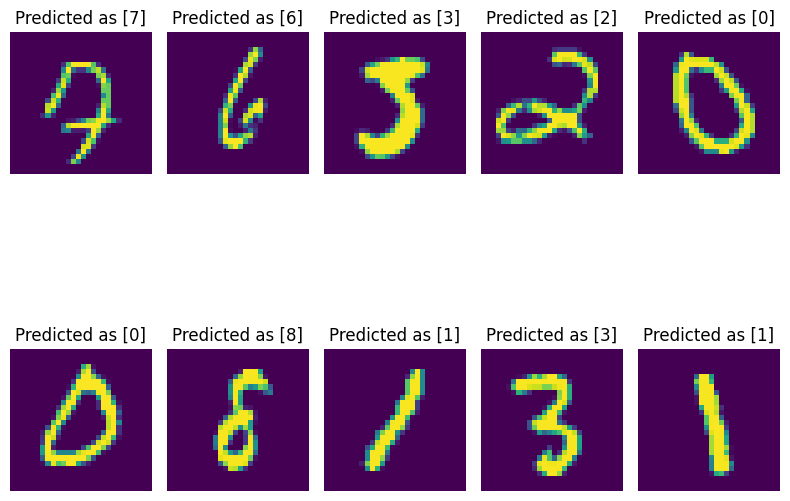

In [23]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()